In [9]:
from rock import *
import pandas as pd
import rock

In [16]:
print(dir(rock))

['KNNImputer', 'NAN_preview', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'accumulate', 'chain', 'checkNAN', 'check_features', 'check_unique', 'combinations', 'combinations_with_replacement', 'compress', 'count', 'createFolder', 'cycle', 'dropwhile', 'filterfalse', 'groupby', 'handle_NAN', 'how_to_use_handle_NAN', 'islice', 'lib', 'make_ANOVA_df', 'make_barplots', 'make_boxplots', 'make_corr_heatmap', 'make_distplots', 'make_pvalue_df', 'make_ttest_df', 'np', 'os', 'pairwise', 'pd', 'permutations', 'plt', 'product', 'repeat', 'sns', 'spst', 'starmap', 'takewhile', 'tee', 'useful', 'warnings', 'zip_longest']


In [18]:
data = pd.read_csv('spaceship-titanic\\train.csv')
display(data.head(), data.shape)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


(8693, 14)

In [22]:
display(checkNAN(data))
cat_feats, num_feats = check_features(data)

,index_in_train,column_name,NAN_number
0,1,HomePlanet,201
1,2,CryoSleep,217
2,3,Cabin,199
3,4,Destination,182
4,6,VIP,203
5,12,Name,200


categorical_features: ['CryoSleep', 'VIP', 'PassengerId', 'HomePlanet', 'Cabin', 'Name', 'Destination', 'Transported']
numerical_features: ['VRDeck', 'Spa', 'Age', 'RoomService', 'ShoppingMall', 'FoodCourt']


In [23]:
cat_feats

['CryoSleep',
 'VIP',
 'PassengerId',
 'HomePlanet',
 'Cabin',
 'Name',
 'Destination',
 'Transported']

In [21]:
df = data.loc[:, ['RoomService', 'Age', 'Spa', 'ShoppingMall', 'FoodCourt', 'VRDeck']]
# list = [['for_fill_na'], ['for_fill_value1', 'for_fill_value2'], ['for_back_fill'], ['for_front_fill'], ['for_linear'], ['for_KNN_imputer1', 'for_KNN_imputer2']]
# fill_na = [ 0, Value_to_fill ] # <-- (The number that goes into the first digit is the order of processing.)
# fill_value = [ 1, [ Value_to_fill1, Value_to_fill2 ]]
fill_na = [-1, 12]
fill_value = [-1, [1]]
back_fill = -1
front_fill = -1
linear = -1
KNN = [ 0, 7 ]

handle_NAN(df, list, fill_na, fill_value, back_fill, front_fill, linear, KNN)
data.loc[:, ['RoomService', 'Age', 'Spa', 'ShoppingMall', 'FoodCourt', 'VRDeck']] = df
checkNAN(data)
# data1 = data.dropna(axis = 0)

,index_in_train,column_name,NAN_number
0,1,HomePlanet,201
1,2,CryoSleep,217
2,3,Cabin,199
3,4,Destination,182
4,6,VIP,203
5,12,Name,200


In [25]:
make_pvalue_df(data, ['Age'], 0.05, ['VRDeck'])

,name1,name2,corr,p-value
0,Age,VRDeck,0.100791,0.0


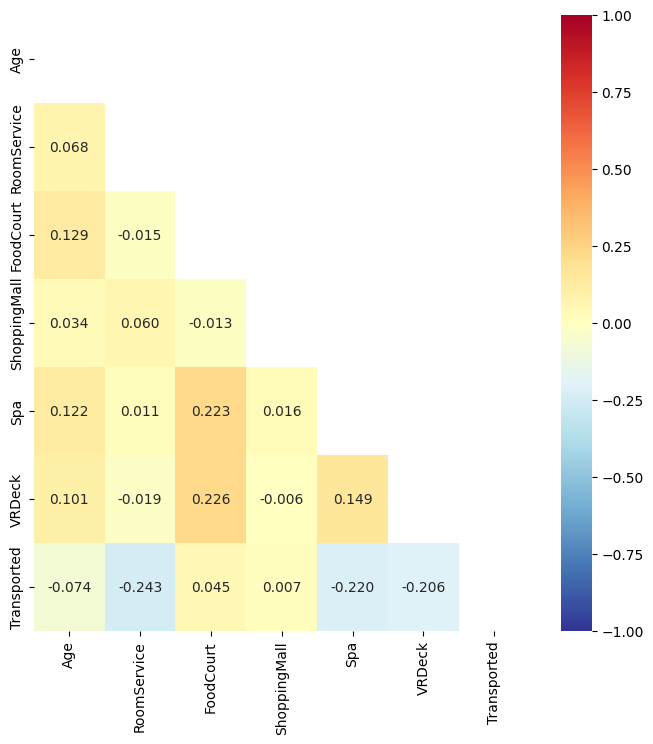

In [27]:
make_corr_heatmap(data)

In [38]:
check_unique(data, 0, 0)

,real_name,name,num
2,CryoSleep,"[False, True]",2
6,VIP,"[False, True]",2
13,Transported,"[False, True]",2
1,HomePlanet,"[Europa, Earth, Mars]",3
4,Destination,"[TRAPPIST-1e, PSO J318.5-22, 55 Cancri e]",3
5,Age,"[39.0, 24.0, 58.0, 33.0, 16.0, 44.0, 26.0, 28....",141
9,ShoppingMall,"[0.0, 25.0, 371.0, 151.0, 3.0, 17.0, 589.0, 11...",1125
7,RoomService,"[0.0, 109.0, 43.0, 303.0, 42.0, 39.0, 73.0, 71...",1242
11,VRDeck,"[0.0, 44.0, 49.0, 193.0, 2.0, 124.0, 113.0, 24...",1267
10,Spa,"[0.0, 549.0, 6715.0, 3329.0, 565.0, 291.0, 216...",1296


In [32]:
data = data.dropna(axis = 0)

In [43]:
make_ttest_df(data, ['Age', 'VRDeck', 'Spa'], 0.05, 'Transported')


,name1,name2,statistic,p-value
0,Age,Transported,6.821231,0.0
1,VRDeck,Transported,18.575575,0.0
2,Spa,Transported,19.397578,0.0


In [70]:
u_num = 5
u_num_data = pd.DataFrame({'num': data[['VIP', 'Transported', 'Cabin']].nunique()})
data1 = u_num_data.drop(u_num_data[u_num_data['num'] > u_num].index)
display(list(data1.index))

['VIP', 'Transported']

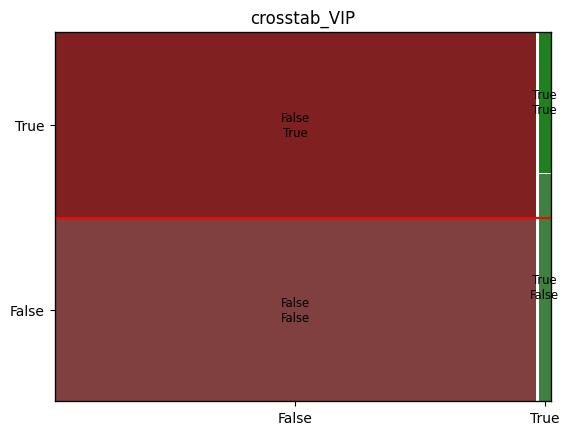

x: VIP, y: Transported


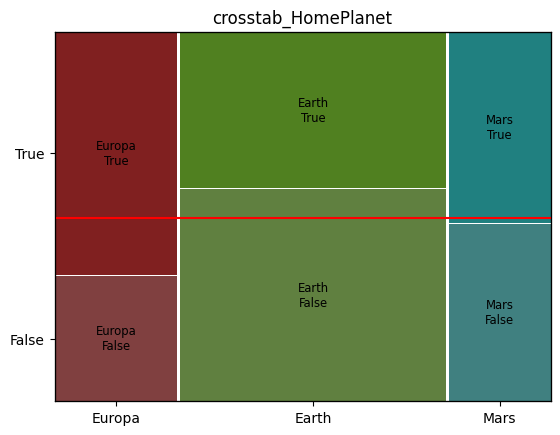

x: HomePlanet, y: Transported
['crosstab_VIP', 'crosstab_HomePlanet']


In [124]:
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic

def make_crosstab_df(data, cat1, cat2, u_num):
    '''
    data = data, cat1 = 기준이 되는 범주형 변수 (ex) Survived, Transported), cat2 = 넣고싶은 모든 범주형 변수, u_num = unique 갯수 제한, (이 개수 이하의 unique값을 가진 변수만 사용됨)
    
    평균선과 하얀선이 겹칠수록 의미가 없음, 평균선(빨간선)에서 멀어질수록 의미가 있어짐
    '''
    if cat1 in cat2:
        cat2.remove(cat1)

    a = []
    b = []
    
    u_num_data = pd.DataFrame(
        {'num': data[cat2].nunique()})
    data1 = u_num_data.drop(u_num_data[u_num_data['num'] > u_num].index)
    cat2_list = list(data1.index)

    count = 0

    for n in cat2_list:
        # print(str(cat2_list[count]))
        # display(pd.crosstab(data[cat1], data[n]))
        globals()["crosstab_{}".format(str(n))] = pd.crosstab(data[cat1], data[n])
        mosaic(data, [n, cat1])
        plt.title("crosstab_" + str(n))
        plt.axhline(1 - data[cat1].mean(), color = 'r')
        plt.show()
        print(f"x: {n}, y: {cat1}")
        print("=="*35)
        a.append(str(globals()["crosstab_{}".format(str(n))]))
        b.append("crosstab_" + str(cat2_list[count]))
        count += 1
    print(b)



name_list = make_crosstab_df(data, 'Transported', ['VIP', 'Cabin', 'HomePlanet'],5)


In [92]:
display(crosstab_HomePlanet)


HomePlanet,Earth,Europa,Mars
Transported,,,
False,2359,642,754
True,1742,1249,813


In [ ]:
from sklearn.metrics import classification_report as creport
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


def plot_confusion_matrix(ax, matrix, labels=['malicious', 'benign'], title='Confusion matrix', fontsize=9):
    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    # Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_xticklabels(labels, rotation='90', fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Blues)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('prediction', fontsize=fontsize)
    ax.set_ylabel('actual', fontsize=fontsize)

    plt.show()


# - 샘플
#### > confusion = confusion_matrix(test_y, dt_pred)
#### > fig, ax = plt.subplots(figsize=(10,3))
#### > plot_confusion_matrix(ax, confusion, fontsize=30)
